In [1]:
alphabets = 'abcdefghijklmnopqrstuvqxyz'

In [2]:
int_to_char = dict(enumerate(alphabets))

In [3]:
int_to_char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'q',
 23: 'x',
 24: 'y',
 25: 'z'}

In [4]:
char_to_int = dict((c,i) for i,c in enumerate(alphabets))
char_to_int

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 22,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'x': 23,
 'y': 24,
 'z': 25}

In [22]:
seq_length = 1
x = []
y = []

for i in range(len(alphabets) - seq_length):
  seq_in = [alphabets[i]] # in list because multiples characters can be in input
  seq_out = alphabets[i + seq_length]
  print(seq_in, '--->', seq_out)
  x.append([[char_to_int[char] for char in seq_in]]) # making it two dimenstional bexause the data to model should be two dimentional not one d like in case of linear regression
  y.append(char_to_int[seq_out])

['a'] ---> b
['b'] ---> c
['c'] ---> d
['d'] ---> e
['e'] ---> f
['f'] ---> g
['g'] ---> h
['h'] ---> i
['i'] ---> j
['j'] ---> k
['k'] ---> l
['l'] ---> m
['m'] ---> n
['n'] ---> o
['o'] ---> p
['p'] ---> q
['q'] ---> r
['r'] ---> s
['s'] ---> t
['t'] ---> u
['u'] ---> v
['v'] ---> q
['q'] ---> x
['x'] ---> y
['y'] ---> z


In [23]:
x

[[[0]],
 [[1]],
 [[2]],
 [[3]],
 [[4]],
 [[5]],
 [[6]],
 [[7]],
 [[8]],
 [[9]],
 [[10]],
 [[11]],
 [[12]],
 [[13]],
 [[14]],
 [[15]],
 [[22]],
 [[17]],
 [[18]],
 [[19]],
 [[20]],
 [[21]],
 [[22]],
 [[23]],
 [[24]]]

In [24]:
y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 22,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

### prepare the input data


In [27]:
import numpy as np

In [37]:
x = np.reshape(x, (len(x), 1, 1)) # because the model take 3 d data (samples, time_step, dimentions)
x

array([[[ 0]],

       [[ 1]],

       [[ 2]],

       [[ 3]],

       [[ 4]],

       [[ 5]],

       [[ 6]],

       [[ 7]],

       [[ 8]],

       [[ 9]],

       [[10]],

       [[11]],

       [[12]],

       [[13]],

       [[14]],

       [[15]],

       [[22]],

       [[17]],

       [[18]],

       [[19]],

       [[20]],

       [[21]],

       [[22]],

       [[23]],

       [[24]]])

In [32]:
x.shape

(25, 1, 1)

In [36]:
# (x - x.min())/(x.max() - x.min()) = x/x.max()
# here x.max() = 25
# because we want out z to printed also that's why we are dividing by 25 not 24

In [38]:
x = x/25

In [42]:
from keras.utils import to_categorical # one hot encoding
y_new = to_categorical(y)

In [43]:
y_new.shape

(25, 26)

In [44]:
y_new

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

### build model

In [47]:
import tensorflow as tf


In [48]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (1,1)),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.SimpleRNN(32),  # default activation is tanh
    tf.keras.layers.Dense(26, activation = 'softmax')
])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

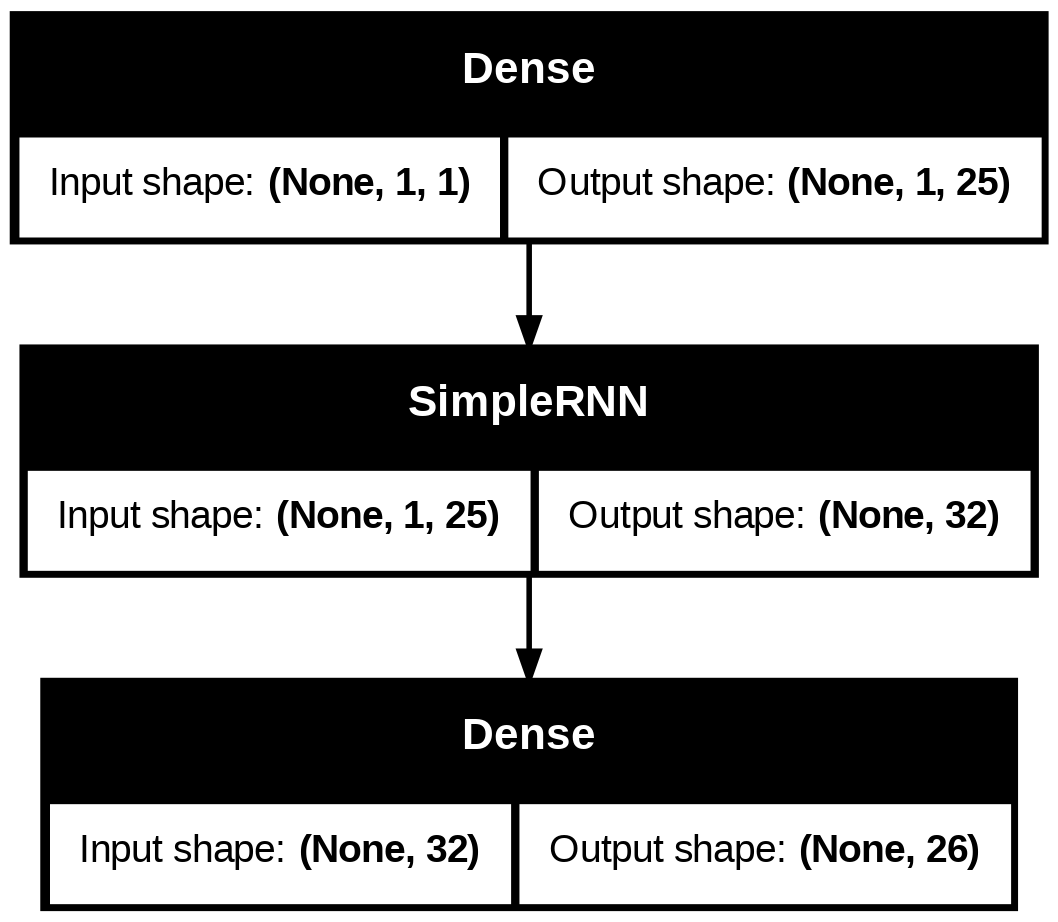

In [51]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [50]:
25*32

800

Compile the model

In [52]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

Train the model

In [66]:
history = model.fit(x, y_new, epochs=500, batch_size=1)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.8949     
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.9322 
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 1.0049 
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.9053 
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.8772
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.9015 
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7559 - loss: 0.8891 
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.8917 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.8896
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.7999 
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.8964 
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [64]:
import pandas  as pd

<Axes: >

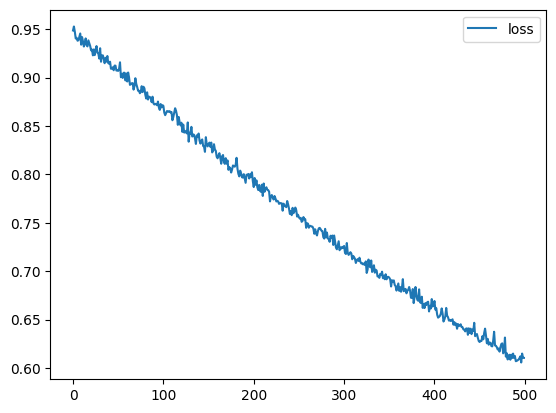

In [67]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(y = ['loss'])

In [70]:
new = 'p'
x_new = np.array([[char_to_int[new]]])
x_new = x_new/25
x_new = x_new.reshape(1,1,1)
y_hat  = model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [71]:
int_to_char[np.argmax(y_hat)]

'q'